In [26]:
import quadratic2SLS as q2sls
import numpy as np
import pandas as pd
import statsmodels.api as sm

In [33]:
# DGP:
# Y = 1.5 + 1.2*X1 - 0.1*(X1)^2 + 3*X2 + 2*X3 + 4*X4 + epsilon
# model 1: X1 = 1 + 2*X3 + 2.5*X4 + 2*Z1 + eta
# model 2: X1 = 1 + 2*X3 + 2.5*X4 + 2*Z2 + eta
# model 3: X1 = 1 + 2*X3 + 2.5*X4 + 2*Z1 + 2*Z2 + eta
# We will leave out X4 from the estimation
# so X1 is the endogenous variable and Z is the instrument

n = 1500
n_bootstraps = 5000

X2 = np.random.binomial(1, 0.7, n)
X3 = np.random.normal(2, 1, n)
X4 = np.random.normal(1.5, 2, n)
Z1 = np.random.normal(2, 1, n)
Z2 = np.random.binomial(1, 0.4, n)
epsilon = np.random.normal(0, 1, n)
eta = np.random.normal(0, 1, n)

# Model 1:
X1_1 = 1 + 2*X3 + 2.5*X4 + 2*Z1 + eta
Y_1 = 1.5 + 1.2*X1_1 - 0.1*(X1_1)**2 + 3*X2 + 2*X3 + 4*X4 + epsilon

# Model 2:
X1_2 = 1 + 2*X3 + 2.5*X4 + 2*Z2 + eta
Y_2 = 1.5 + 1.2*X1_2 - 0.1*(X1_2)**2 + 3*X2 + 2*X3 + 4*X4 + epsilon

# Model 2:
X1_3 = 1 + 2*X3 + 2.5*X4 + 2*Z1 + 2*Z2 + eta
Y_3 = 1.5 + 1.2*X1_3 - 0.1*(X1_3)**2 + 3*X2 + 2*X3 + 4*X4 + epsilon

# Constructing the data sets
exogenous = pd.DataFrame({'X2' : X2, 'X3' : X3})
exogenous = sm.add_constant(exogenous)
endog1 = pd.DataFrame({'X1' : X1_1})
endog2 = pd.DataFrame({'X1' : X1_2})
endog3 = pd.DataFrame({'X1' : X1_3})
instruments1 = pd.DataFrame({'Z1' : Z1})
instruments2 = pd.DataFrame({'Z2' : Z2})
instruments3 = pd.DataFrame({'Z1' : Z1, 'Z2' : Z2})
Y_1 = pd.DataFrame({'Y' : Y_1})
Y_2 = pd.DataFrame({'Y' : Y_2})
Y_3 = pd.DataFrame({'Y' : Y_3})

## Estimating the models
# model 1:
model1 = q2sls.Quadratic2SLS(Y_1, exogenous, endog1, instruments1)
result1 = model1.fit(cov_type='Bootstrap', n_iter = n_bootstraps)

# model 2:
model2 = q2sls.Quadratic2SLS(Y_2, exogenous, endog2, instruments2)
result2 = model2.fit(cov_type='Bootstrap', n_iter = n_bootstraps)

# model 3:
model3 = q2sls.Quadratic2SLS(Y_3, exogenous, endog3, instruments3)
result3 = model3.fit(cov_type='Bootstrap', n_iter = n_bootstraps)

100%|██████████| 5000/5000 [00:57<00:00, 87.51it/s]


In [34]:
coeff_estms1 = pd.DataFrame([result1.beta_hat_boots.mean(axis=0), result1.result2.params]).transpose()
coeff_estms1.columns = ['Bootstrapped', 'Full_Sample']
coeff_estms1['True_Coeffs'] = [1.5, 1.2, 0.1, 3, 2]
coeff_estms1

,Bootstrapped,Full_Sample
const,746.502873,-14.724628
endog_hat,-152.498194,5.854600
endog_sq_hat,6.209220,-0.285066
X2,30.190102,2.411251
X3,-10.649633,1.625686


/Users/nadavtadelis/anaconda/envs/study_env/lib/python3.6/site-packages/seaborn/timeseries.py:183: UserWarning: The tsplot function is deprecated and will be removed or replaced (in a substantially altered version) in a future release.
  warnings.warn(msg, UserWarning)


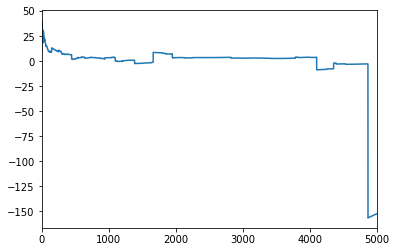

In [35]:
import seaborn as sns
cumsum_beta_hat_boots = np.cumsum(result1.beta_hat_boots['endog_hat'])
sns.tsplot(cumsum_beta_hat_boots/np.arange(n_bootstraps));

In [42]:
coeff_estms3 = pd.DataFrame([result3.beta_hat_boots.mean(axis=0), result3.result2.params]).transpose()
coeff_estms3.columns = ['Bootstrapped', 'Full_Sample']
coeff_estms3['True_Coeffs'] = [1.5, 1.2, 0.1, 3, 2]
coeff_estms3

,Bootstrapped,Full_Sample,True_Coeffs
const,-2.617865,1.589438,1.5
endog_hat,3.271453,2.454104,1.2
endog_sq_hat,-0.178708,-0.146940,0.1
X2,2.486843,2.491079,3.0
X3,1.702747,1.712935,2.0


/Users/nadavtadelis/anaconda/envs/study_env/lib/python3.6/site-packages/seaborn/timeseries.py:183: UserWarning: The tsplot function is deprecated and will be removed or replaced (in a substantially altered version) in a future release.
  warnings.warn(msg, UserWarning)


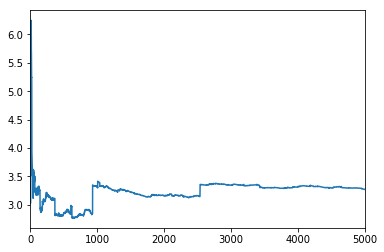

In [39]:
cumsum_beta_hat_boots = np.cumsum(result3.beta_hat_boots['endog_hat'])
sns.tsplot(cumsum_beta_hat_boots/np.arange(n_bootstraps));